In [3]:
import sys
import os
sys.path.append(os.path.abspath("../"))

import pandas as pd
import matplotlib.pyplot as plt

# Import modular functions
from src.data_processing import load_news
from src.article_analysis import (
    compute_headline_length, 
    publisher_stats, 
    daily_hourly_counts, 
    extract_keywords, 
    run_lda
)
from src.visualization import plot_daily_counts, plot_hourly_counts

plt.style.use("seaborn-v0_8-darkgrid")


In [4]:
# Load the news data
news_fp = "../data/raw_analyst_ratings.csv"
df = load_news(news_fp)

# Quick check
df.head()


,Unnamed: 0,headline,url,publisher,date,stock,news_date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22


In [5]:
# Compute headline lengths
df = compute_headline_length(df)

# Show statistics
print(df['headline_length'].describe())


count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


In [6]:
# Compute publisher counts and mean headline length
pub_counts, pub_mean_lengths = publisher_stats(df)

# Display results
print(pub_counts)
print(pub_mean_lengths)


publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
Jennifer Lynn            1
Tatro Capital            1
webmaster                1
Thomas Stein             1
Usman Rafi               1
Name: count, Length: 225, dtype: int64
publisher
Benzinga Newsdesk        226.071766
Benzinga  Newsdesk       175.562500
Investor Ideas           122.000000
Othanas Economopoulos    115.000000
luke@benzinga.com        106.804428
                            ...    
Scout Finance             28.000000
Dave Wienke               27.000000
Tatro Capital             26.000000
Jane Sanders              25.000000
Spencer Purdy             25.000000
Name: headline_length, Length: 225, dtype: float64


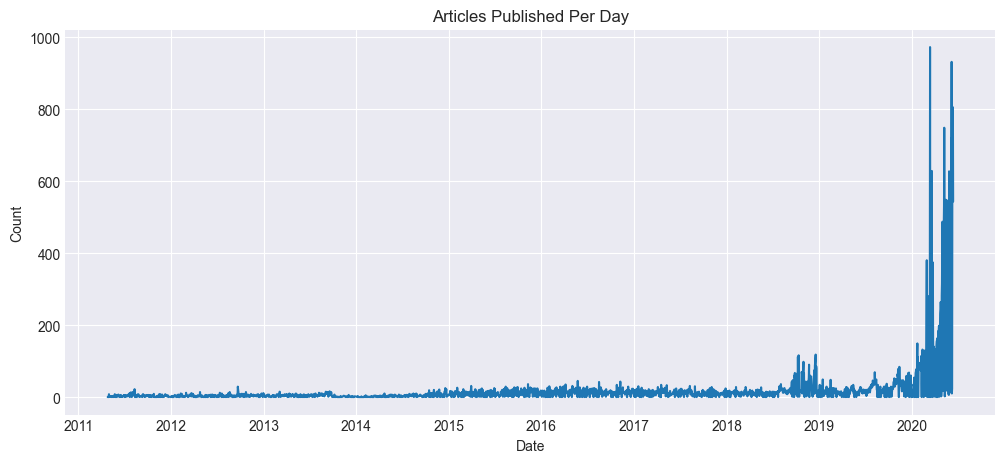

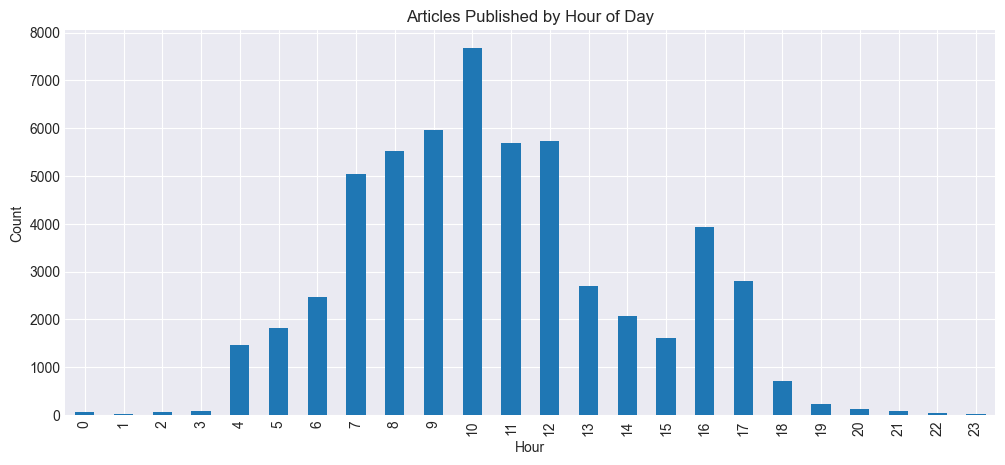

In [7]:
# Compute daily and hourly counts
daily_counts, hourly_counts = daily_hourly_counts(df)

# Plot daily and hourly distributions
plot_daily_counts(daily_counts)
plot_hourly_counts(hourly_counts)


In [ ]:
vectorizer, keywords_matrix, keywords = extract_keywords(df, max_features=30)
print("Top keywords:", keywords)


ValueError: not enough values to unpack (expected 3, got 2)